In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
os.chdir('/Users/Lenovo/Desktop/EBAC')
import warnings
warnings.filterwarnings('ignore')

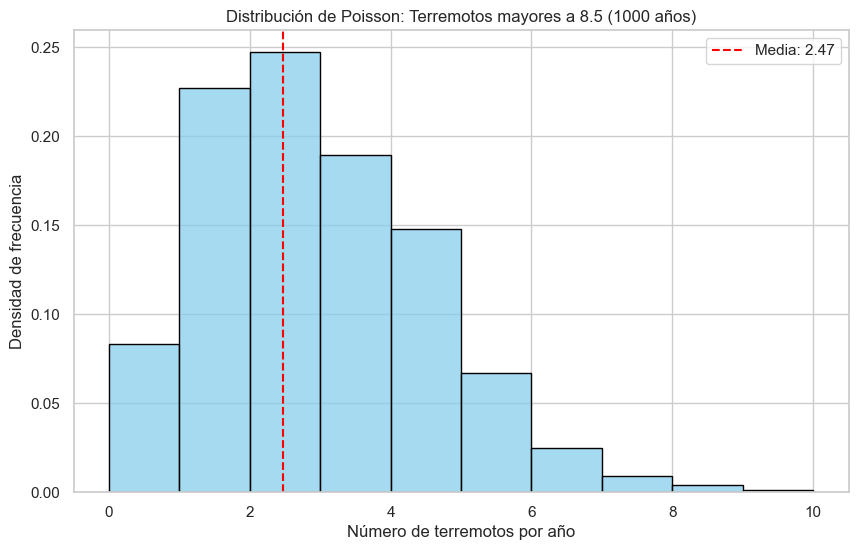

In [7]:
# Distribucion Poisson
lambda_ps = 2.5
muestra = 1000
terremotos = np.random.poisson(lam=lambda_ps, size=muestra)

# Distribucion
sb.set(style="whitegrid")
plt.figure(figsize=(10,6))
sb.histplot(terremotos, bins=range(0, max(terremotos)+2), kde=False, stat="density", color="skyblue", edgecolor="black")
plt.title("Distribución de Poisson: Terremotos mayores a 8.5 (1000 años)")
plt.xlabel("Terremotos por año")
plt.ylabel("Frecuencias")
plt.axvline(np.mean(terremotos), color='red', linestyle='--', label=f"Media: {np.mean(terremotos):.2f}")
plt.legend()
plt.show()

In [11]:
data = pd.read_csv('marketing_campaign (2).csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Definimos Hipotesis
Hipótesis Nula: Existe relevancia entre Las visitas al sitio y las compras.

Hipótesis Alternativa: No existe relevancia entre Las visitas al sitio y las compras.

In [23]:
from scipy.stats import ttest_ind
# Muestra
sampled_df = data.sample(n=100, random_state=100)

<Axes: xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>

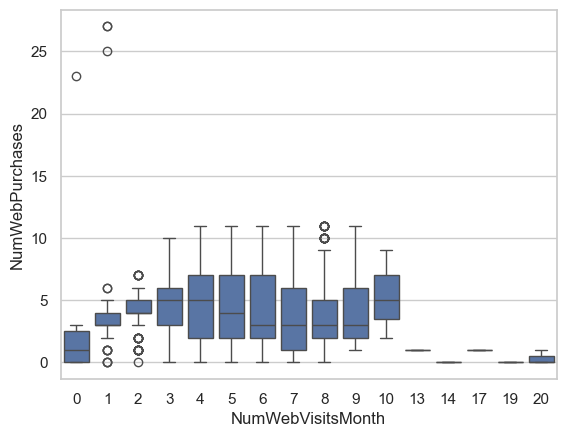

In [15]:
# Garfiquemos un boxplot con las variables de NumWebVisitsMonth y NumWebPurchases
sb.boxplot(y = data['NumWebPurchases'], x =data['NumWebVisitsMonth'])

In [19]:
# Grupos de acuerdo al número de hijos
Alto_num_visitas = sampled_df[sampled_df['NumWebVisitsMonth']>5]['NumWebPurchases']
Bajo_num_visitas = sampled_df[sampled_df['NumWebVisitsMonth']<5]['NumWebPurchases']

In [27]:
# Prueba estadística
from scipy.stats import f_oneway

t_stat, p_value = f_oneway(Alto_num_visitas, Bajo_num_visitas)
print('t-statistics:', t_stat, '\np-value', p_value)

if p_value < 0.05:
    print('Reject Null Hypothesis')
elif p_value >= 0.05:
    print('Fail to reject Null Hypothesis')

t-statistics: 1.4773661518378833 
p-value 0.22740148576681934
Fail to reject Null Hypothesis


# Conclusion
De acuerdo al analisis, no rechazamos la hipotesis nula, por lo que podemos concluir que si existe cierta relevancia entre las dos variables.